___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
weather = pd.read_csv("weather.csv")

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)


ri.set_index('stop_datetime', inplace=True)

C:\Users\Casper\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, you'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [48]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
weather.shape

(8022, 26)

In [50]:
weather.tail()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
8017,USW00014765,2015-12-27,9.17,51.0,61.0,44.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018,USW00014765,2015-12-28,12.30,40.0,44.0,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,USW00014765,2015-12-29,12.53,33.0,40.0,28.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8021,USW00014765,2015-12-31,8.05,39.0,50.0,35.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
weather[["TMIN", "TAVG", "TMAX"]]

,TMIN,TAVG,TMAX
0,28.0,NaN,47.0
1,24.0,NaN,52.0
2,27.0,NaN,48.0
3,40.0,NaN,54.0
4,31.0,NaN,44.0
...,...,...,...
8017,44.0,51.0,61.0
8018,30.0,40.0,44.0
8019,28.0,33.0,40.0
8020,27.0,30.0,35.0


In [52]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


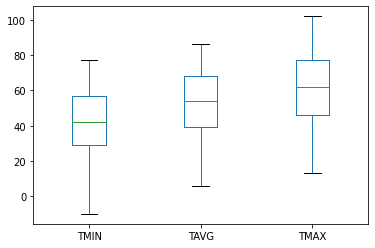

In [53]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind="box")  # outlier'larla mücadele ederken box plot kullanılır

plt.show()

***

## Plotting the temperature difference

In this exercise, you'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting **histogram**? Does it match your expectations, or do you see anything unusual?

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [54]:
weather["TMAX"] 

0       47.0
1       52.0
2       48.0
3       54.0
4       44.0
        ... 
8017    61.0
8018    44.0
8019    40.0
8020    35.0
8021    50.0
Name: TMAX, Length: 8022, dtype: float64

In [55]:
weather["TMIN"] 

0       28.0
1       24.0
2       27.0
3       40.0
4       31.0
        ... 
8017    44.0
8018    30.0
8019    28.0
8020    27.0
8021    35.0
Name: TMIN, Length: 8022, dtype: float64

In [56]:
weather["TMAX"] - weather["TMIN"] 

0       19.0
1       28.0
2       21.0
3       14.0
4       13.0
        ... 
8017    17.0
8018    14.0
8019    12.0
8020     8.0
8021    15.0
Length: 8022, dtype: float64

In [57]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"] 

In [58]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

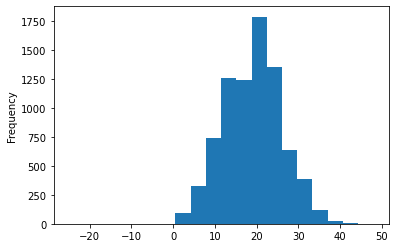

In [59]:
weather.TDIFF.plot(kind="hist", bins=20)

plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [60]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [61]:
WT = weather.loc[:, "WT01":"WT22"]

In [62]:
WT.head(3)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
weather["bad_conditions"] = WT.sum(axis="columns")

In [64]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0


In [65]:
weather.sample(5)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
4416,USW00014765,2006-02-16,5.82,NaN,55.0,29.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,2.0
5188,USW00014765,2008-03-29,12.97,NaN,43.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4948,USW00014765,2007-08-02,6.49,NaN,93.0,67.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,1.0
7847,USW00014765,2015-07-10,8.50,71.0,83.0,63.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1.0
4005,USW00014765,2005-01-01,8.95,44.0,53.0,35.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2.0


In [66]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype("int")

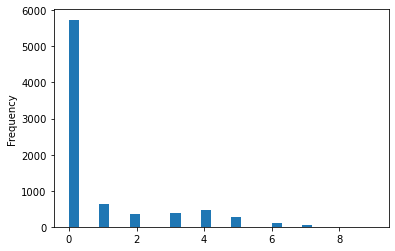

In [67]:
weather.bad_conditions.plot(kind="hist", bins=30)

plt.show()

In [68]:
weather.bad_conditions.value_counts(dropna=False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [69]:
weather.bad_conditions.value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [70]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [71]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [72]:
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [73]:
weather.rating[0]

'good'

In [74]:
type(weather.rating[0])

str

In [75]:
categ = ["good", "bad", "worse"]  # kategorilerimizi belirledik

In [76]:
weather["rating"] = pd.Categorical(weather.rating, categories = categ, ordered=True)  # categoric'e çevirdik. sıraladık

In [77]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [84]:
ri.reset_index(inplace=True)  # indexi sıfırladık. stop_datetime column oldu

In [79]:
weather.head(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0,good


In [80]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22',
       'TDIFF', 'bad_conditions', 'rating'],
      dtype='object')

In [81]:
weather_rating = weather[["DATE", "rating"]]

In [82]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [83]:
ri.shape

(48010, 22)

In [85]:
ri_weather = pd.merge(left = ri, right = weather_rating, left_on="stop_date", right_on="DATE", how = "left")

In [86]:
ri_weather.shape  # merge ettiğimiz için satırlar neredeyse 2 katına çıktı.

(95877, 25)

In [87]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


In [88]:
ri_weather.set_index("stop_datetime", inplace=True)

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [90]:
ri_weather.is_arrested.mean()  # boolean olduğu için direkt mean() ile oranını alabilirim

0.05181638974936638

In [91]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [94]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()  # hava durumu kötüleştikçe tutuklanma oranı artmış

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [95]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).is_arrested.mean() 

In [97]:
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [96]:
arrest_rate.unstack()  # pandas serie'sini dataframe'e çevirdik

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [99]:
ri_weather.pivot_table(index = "violation", columns = "rating", values = "is_arrested")

# pivot table'da default aggregation'u mean'dir

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [101]:
ri_weather.pivot_table(index = "violation", columns = "rating", values = "is_arrested").T

# sütunları satır satırları sütun yaptık

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168
